In [1]:
!pip install -U pandas-profiling
import os
os.system("pip install facenet-pytorch")

     |████████████████████████████████| 248 kB 11.8 MB/s 
     |████████████████████████████████| 62 kB 763 kB/s 
     |████████████████████████████████| 636 kB 48.3 MB/s 
     |████████████████████████████████| 102 kB 27.8 MB/s 
     |████████████████████████████████| 3.1 MB 24.8 MB/s 
     |████████████████████████████████| 10.1 MB 47.3 MB/s 
     |████████████████████████████████| 675 kB 49.5 MB/s 
     |████████████████████████████████| 812 kB 24.1 MB/s 
     |████████████████████████████████| 28.5 MB 45 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=db18568d856699c23293aaea4fb16c7965ce7dccf91950a59577a3282dc041fc
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=3ca5c25a51bb7d0256ac1db2fc0894b6543157f51c797cfa3157a7263f37df7c
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3

0

In [2]:
os.system("git clone https://github.com/timesler/facenet-pytorch.git facenet_pytorch")

0

In [3]:
from facenet_pytorch import MTCNN, InceptionResnetV1

In [4]:
# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=400, margin="/content/")

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [8]:

from facenet_pytorch import MTCNN
import torch
import numpy as np
import  cv2
from PIL import Image, ImageDraw
from IPython import display

import matplotlib.pyplot as plt


In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

mtcnn = MTCNN(keep_all=True, device=device)

Running on device: cuda:0


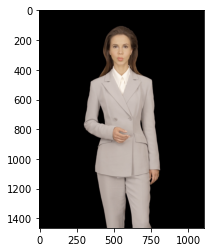

In [9]:
frame =  cv2.imread('/content/tmp.png')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


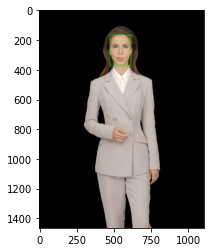

In [10]:

import matplotlib.pyplot as plt

frame =  cv2.imread('/content/tmp.png')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


boxes, _ = mtcnn.detect(frame)

color = (0, 255, 0)
thickness = 2

for (x0, y0, x1, y1) in boxes:
    cv2.rectangle(frame, (x0, y0), (x1, y1), color, thickness)

x0, y0, x1, y1 = 0,0,0,0
for (x_0, y_0, x_1, y_1) in boxes:
  x0, y0, x1, y1 = int(x_0), int(y_0), int(x_1), int(y_1)


face = frame[y0:y1, x0:x1]

plt.imshow(frame)


(201, 142, 3)


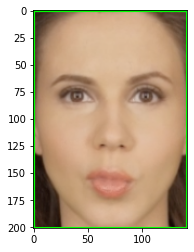

In [11]:
plt.imshow(face)
print(face.shape)